<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/TaskWeek8/Svm_BankChurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/dataset/BankChurners.csv'

# Membaca file CSV ke DataFrame menggunakan pandas
df = pd.read_csv(file_path)

# Menampilkan DataFrame
df


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Menampilkan beberapa baris pertama dari dataset sebelum penghapusan NaN
print("Sebelum penghapusan NaN:")
print(df.head())

# Memilih kolom fitur yang akan digunakan
features = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Memisahkan fitur dan target
X = df[features]
y = df['Card_Category']

# Mengonversi kolom kategorikal menjadi variabel dummy
X = pd.get_dummies(X, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

# Imputasi nilai NaN (jika ada)
imputer = SimpleImputer(strategy='mean')  # Anda dapat memilih strategi lain sesuai kebutuhan
X_imputed = imputer.fit_transform(X)

# Membaca kembali ke DataFrame
X = pd.DataFrame(X_imputed, columns=X.columns)

# Menghapus baris yang masih memiliki nilai NaN
df_cleaned = pd.concat([X, y], axis=1).dropna()

# Menampilkan beberapa baris pertama dari dataset setelah penghapusan NaN
print("\nSetelah penghapusan NaN:")
print(df_cleaned.head())

# Memisahkan fitur dan target setelah penghapusan NaN
X_cleaned = df_cleaned.drop(columns=['Card_Category'])
y_cleaned = df_cleaned['Card_Category']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVM
model = SVC(kernel='linear')  # Anda dapat memilih kernel yang sesuai dengan karakteristik data Anda

# Melatih model
model.fit(X_train_scaled, y_train)

# Membuat prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')


Sebelum penghapusan NaN:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777    

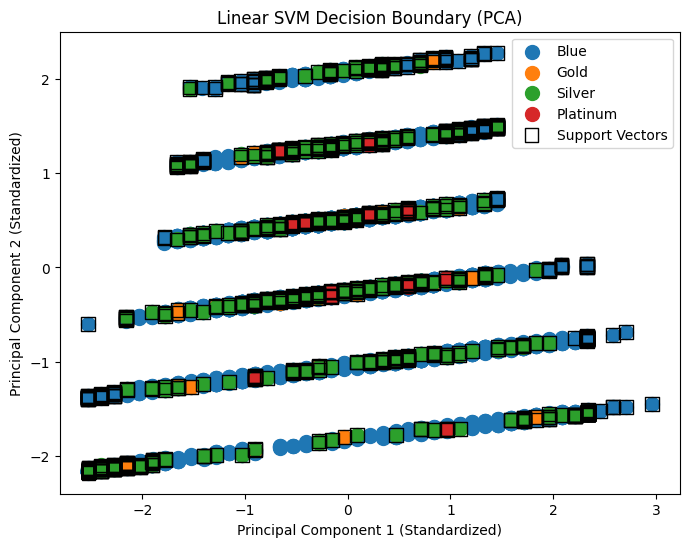

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Menerapkan PCA untuk mereduksi dimensi menjadi 2 fitur
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cleaned)

# Membagi data menjadi data pelatihan dan pengujian
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_cleaned, test_size=0.2, random_state=42)

# Standarisasi fitur pada hasil PCA
scaler_pca = StandardScaler()
X_train_pca_scaled = scaler_pca.fit_transform(X_train_pca)
X_test_pca_scaled = scaler_pca.transform(X_test_pca)

# Membuat model SVM dengan kernel linier
model_pca = SVC(kernel='linear')
model_pca.fit(X_train_pca_scaled, y_train_pca)

# Visualisasi hasil
plt.figure(figsize=(8, 6))

# Plot data pelatihan pada hasil PCA
for category in y_train_pca.unique():
    indices = np.where(y_train_pca == category)
    plt.scatter(X_train_pca_scaled[indices, 0], X_train_pca_scaled[indices, 1], label=category, s=100)

# Plot vektor dukungan
sv_pca = model_pca.support_vectors_
plt.scatter(sv_pca[:, 0], sv_pca[:, 1], facecolors='none', edgecolors='k', marker='s', s=100, label='Support Vectors')

# Plot batas keputusan
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Membuat grid untuk plotting
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])


plt.title('Linear SVM Decision Boundary (PCA)')
plt.xlabel('Principal Component 1 (Standardized)')
plt.ylabel('Principal Component 2 (Standardized)')
plt.legend()
plt.show()